# result

<Figure size 800x600 with 0 Axes>

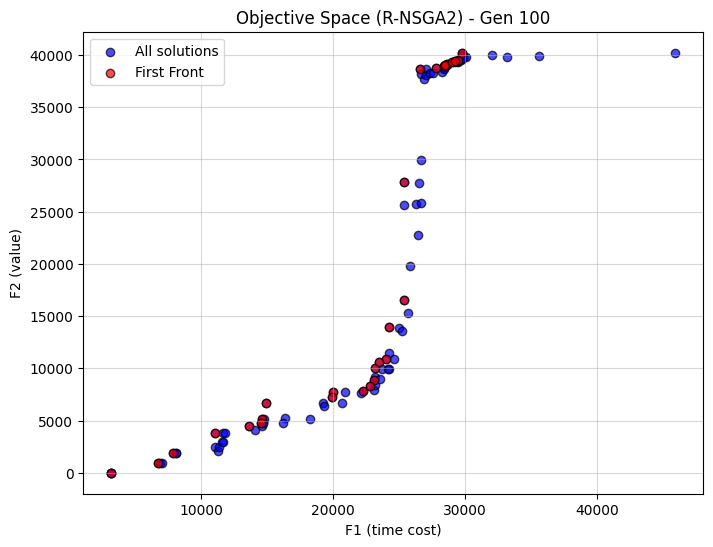

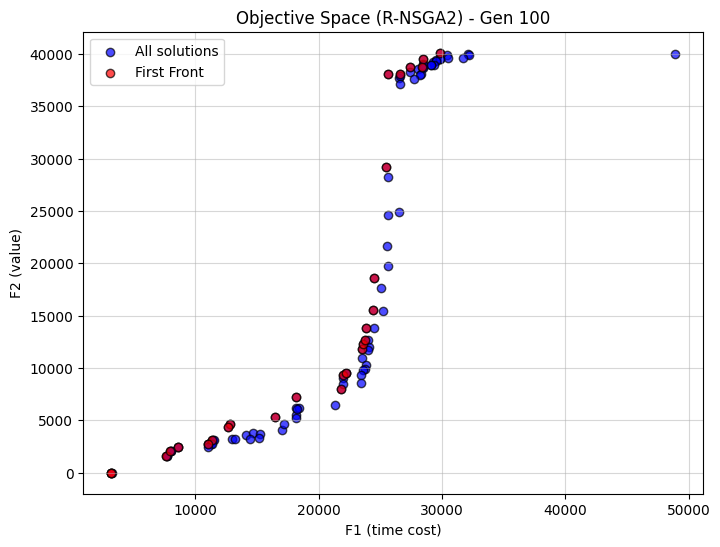

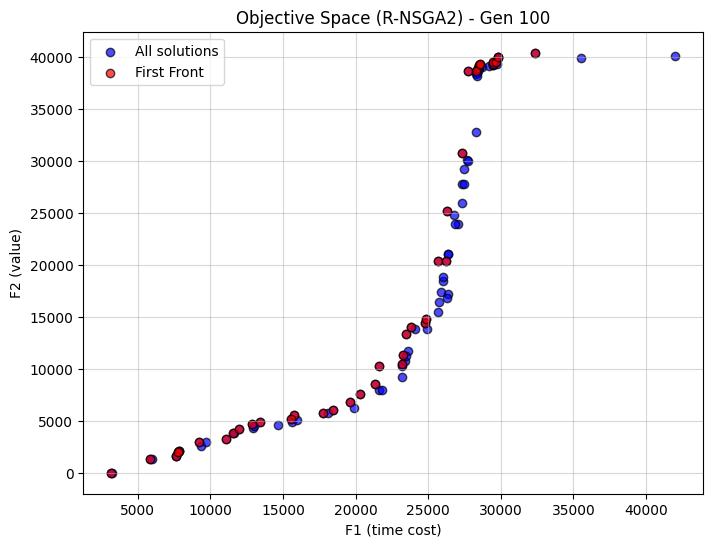

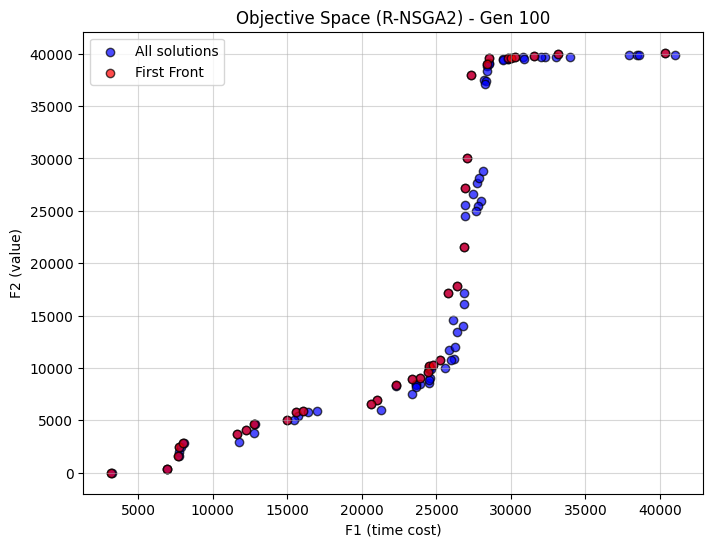

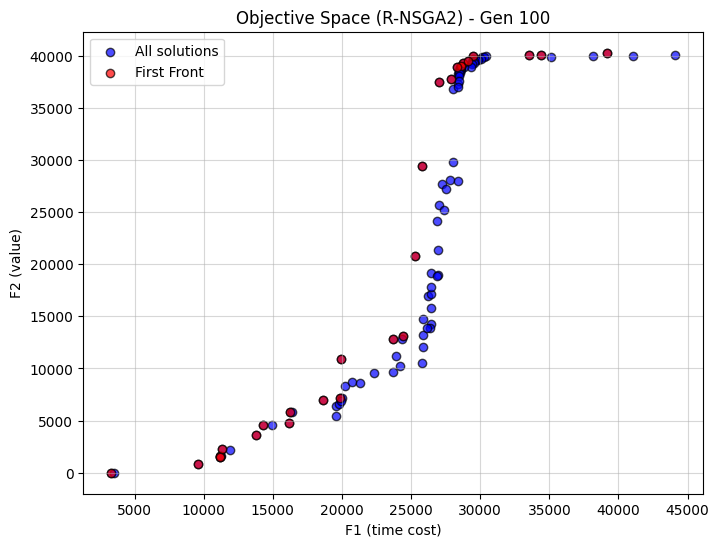

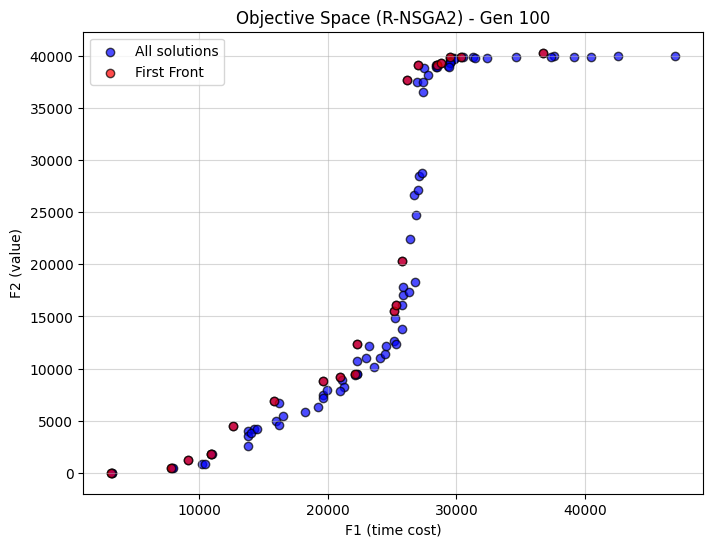

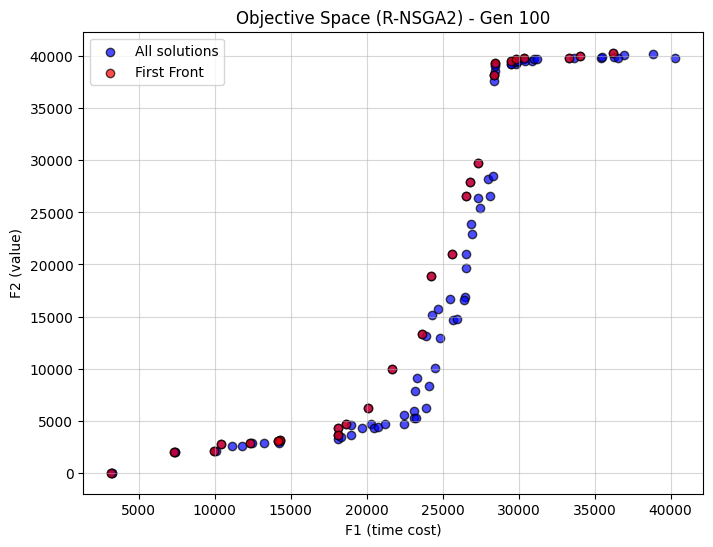

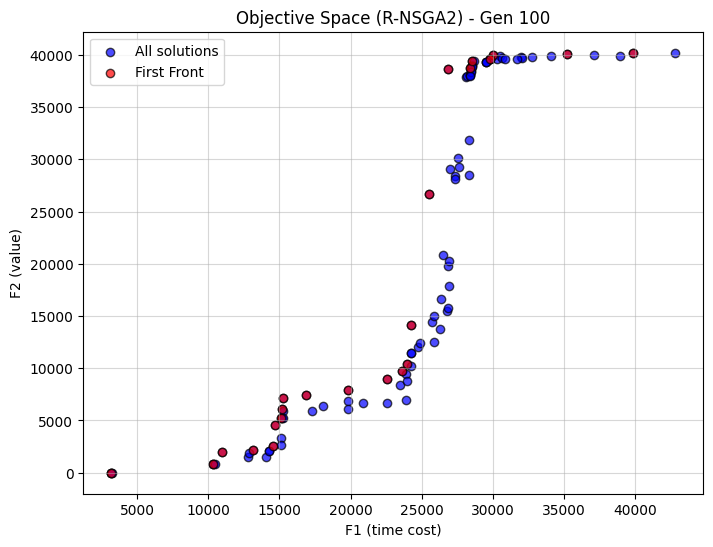

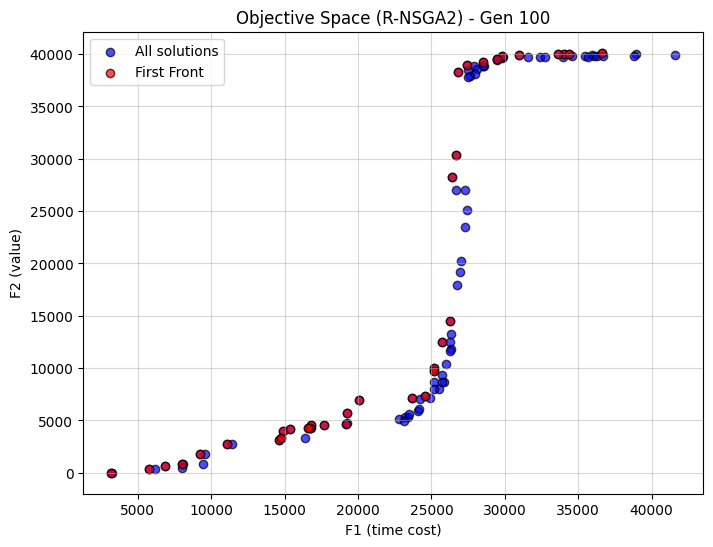

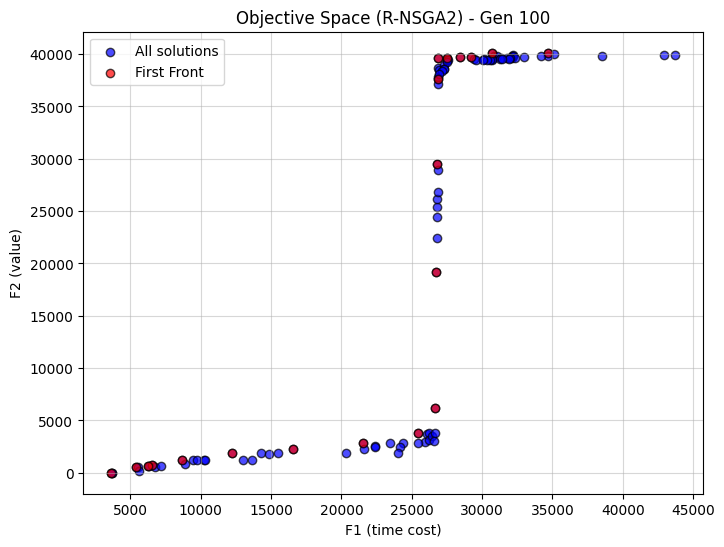

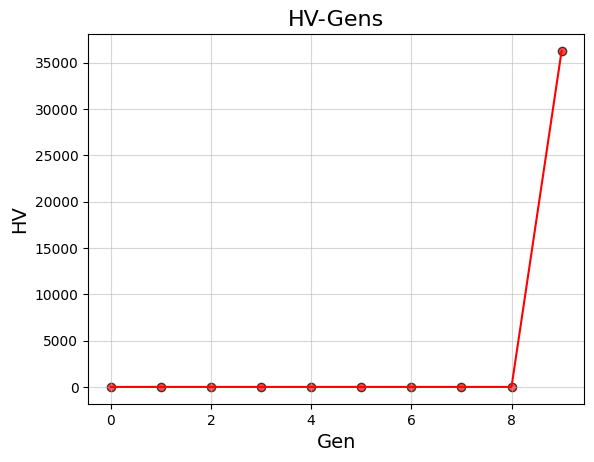

In [ ]:
from pymoo.indicators.hv import Hypervolume
import numpy as np
import random
import matplotlib.pyplot as plt
# opt
C = 1
file_name = 'a280-n279.txt'
# file_name = 'fnl4461-n4460.txt'
pop_size = 100
n_gens = 100
random_seed = 114514
reference_points = read_rp('HPI_a280-n279.f')
hv_point = np.array([5444.0, -0.0])  # Nadir Point
hv = Hypervolume(ref_point=hv_point)
HV = []
res_3 = []


distance_matrix, items, cities_count, items_count = read_ttp_data(file_name)
capacity = np.sum(items[:, 2]) * (C/11)

initial_path, initial_selections = generate_initial_solutions(pop_size, cities_count, items_count, items, C, distance_matrix, random_seed)


plt.figure(figsize=(8, 6))
for i in range(10):
  res_pop = R_NSGA2(
      pop_size = pop_size,
      n_gens = n_gens,
      reference_points = reference_points,
      cities_count = cities_count,
      items_count = items_count,
      items = items,
      C = C,
      distance_matrix = distance_matrix,
      path = initial_path,
      selections = initial_selections,
      random_seed = random_seed,
      cross_rate = 0.8,
      mut_rate = 0.3)
  HV.append(hv.do(res_pop[2]))
  res_3.append(res_pop)
  random_seed += 1


plt.scatter(range(len(HV)), HV, c='r', edgecolors='k', alpha=0.7, label = 'HV')
plt.plot(HV, c='r')

plt.title("HV-Gens", fontsize=16)
plt.xlabel("Gen", fontsize=14)
plt.ylabel("HV", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

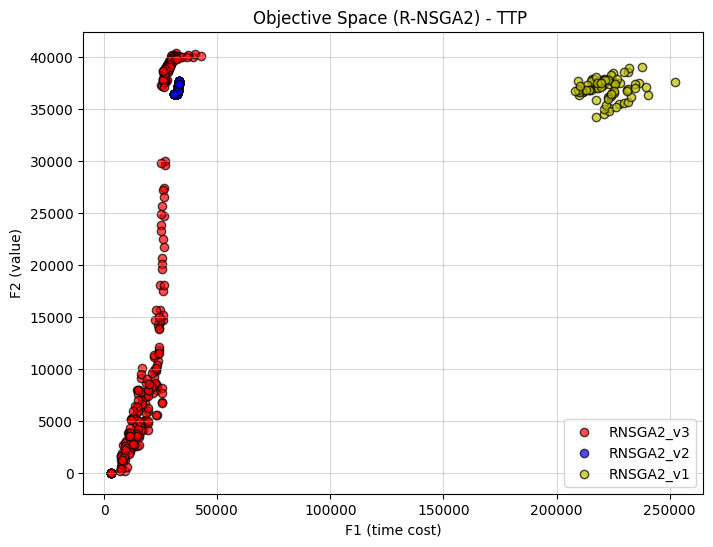

In [ ]:
total_result1 = res[0][2]
total_result2 = res_2[0][2]
total_result3 = res_3[0][2]
for i in range(1, 10):
    total_result3 = np.vstack((total_result3, res_3[i][2]))
    total_result2 = np.vstack((total_result2, res_2[i][2]))
    total_result1 = np.vstack((total_result1, res[i][2]))

# Convert to numpy arrays for slicing, if necessary
import numpy as np
total_result3 = np.array(total_result3)
total_result2 = np.array(total_result2)
total_result1 = np.array(total_result1)

# Adjust slicing depending on your data structure
plt.figure(figsize=(8, 6))
plt.scatter(total_result3[:, 0], -total_result3[:, 1], c='red', edgecolors='k', alpha=0.7, label='RNSGA2_v3')
plt.scatter(total_result2[:, 0], -total_result2[:, 1], c='b', edgecolors='k', alpha=0.7, label='RNSGA2_v2')
plt.scatter(total_result1[:, 0], -total_result1[:, 1], c='y', edgecolors='k', alpha=0.7, label='RNSGA2_v1')
plt.title("Objective Space (R-NSGA2) - TTP ")
plt.xlabel("F1 (time cost)")
plt.ylabel("F2 (value)")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.scatter(total_result3[:, 0], -total_result3[:, 1], c='red', edgecolors='k', alpha=0.7, label='RNSGA2_v3')
# plt.scatter(total_result2[:, 0], -total_result2[:, 1], c='b', edgecolors='k', alpha=0.7, label='RNSGA2_v2')
# # plt.scatter(total_result1[:, 0], -total_result1[:, 1], c='y', edgecolors='k', alpha=0.7, label='RNSGA2_v1')
# plt.title("Objective Space (R-NSGA2) - TTP ")
# plt.xlabel("F1 (time cost)")
# plt.ylabel("F2 (value)")
# plt.grid(alpha=0.5)
# plt.legend()
# plt.show()

# plt.figure(figsize=(8, 6))
# # plt.scatter(total_result3[:, 0], -total_result3[:, 1], c='red', edgecolors='k', alpha=0.7, label='RNSGA2_v3')
# plt.scatter(total_result2[:, 0], -total_result2[:, 1], c='b', edgecolors='k', alpha=0.7, label='RNSGA2_v2')
# plt.scatter(total_result1[:, 0], -total_result1[:, 1], c='y', edgecolors='k', alpha=0.7, label='RNSGA2_v1')
# plt.title("Objective Space (R-NSGA2) - TTP ")
# plt.xlabel("F1 (time cost)")
# plt.ylabel("F2 (value)")
# plt.grid(alpha=0.5)
# plt.legend()
# plt.show()


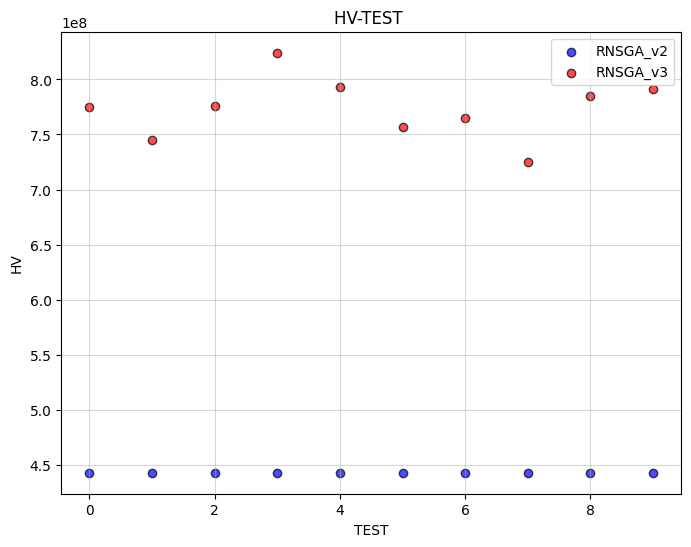

RNSGA2_v2 mean HV:442891951.9257118
RNSGA2_v3 mean HV:773535996.0894699
提升幅度为1.7465569033849107


In [ ]:
from pymoo.indicators.hv import Hypervolume
# rp = [10000, 0]
rp = [max(total_result3[:, 0]), 0]
hv = Hypervolume(rp)
HV2 = []
HV3 = []
for i in range(10):
      HV2.append(hv.do(res_2[i][2]))
      HV3.append(hv.do(res_3[i][2]))

plt.figure(figsize=(8, 6))
plt.scatter(range(len(HV2)), HV2, c='b', edgecolors='k', alpha=0.7, label='RNSGA_v2')
plt.scatter(range(len(HV3)), HV3, c='r', edgecolors='k', alpha=0.7, label='RNSGA_v3')
plt.title("HV-TEST ")
plt.xlabel("TEST")
plt.ylabel("HV")
plt.grid(alpha=0.5)
plt.legend()
plt.show()
print(f'RNSGA2_v2 mean HV:{np.mean(HV2)}')
print(f'RNSGA2_v3 mean HV:{np.mean(HV3)}')
print(f'提升幅度为{np.mean(HV3)/np.mean(HV2)}')


In [ ]:
print(f'RNSGA2_v1 mean F(time cost, profit) :{(np.mean(total_result1[:,0]), -np.mean(total_result1[:,1]))}')
print(f'RNSGA2_v2 mean F(time cost, profit) :{(np.mean(total_result2[:,0]), -np.mean(total_result2[:,1]))}')
print(f'RNSGA2_v3 mean F(time cost, profit) :{(np.mean(total_result3[:,0]), -np.mean(total_result3[:,1]))}')


RNSGA2_v1 mean F(time cost, profit) :(222745.37033894504, 36966.28767123288)
RNSGA2_v2 mean F(time cost, profit) :(32400.880298493837, 36998.857142857145)
RNSGA2_v3 mean F(time cost, profit) :(20998.074069770497, 18819.275862068964)
